# Ford GoBike Data Exploration

## Preliminary Wrangling

This document explores a dataset containing prices and attributes for approximately 54,000 round-cut diamonds.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print('-'*100)
print(df.dtypes)
print('-'*100)
print(df.head(10))

(183412, 16)
----------------------------------------------------------------------------------------------------
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
----------------------------------------------------------------------------------------------------
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560  

In [4]:
#Convert missassigned data types

# id columns into objects
df = df.apply(lambda col: col.astype('object') if 'id' in col.name else col)

# date columns into datetime
df = df.apply(lambda col: pd.to_datetime(col) if 'time' in col.name else col)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [5]:
# descriptive statistics for numeric variables
print(df.describe())

        duration_sec  start_station_latitude  start_station_longitude  \
count  183412.000000           183412.000000            183412.000000   
mean      726.078435               37.771223              -122.352664   
std      1794.389780                0.099581                 0.117097   
min        61.000000               37.317298              -122.453704   
25%       325.000000               37.770083              -122.412408   
50%       514.000000               37.780760              -122.398285   
75%       796.000000               37.797280              -122.286533   
max     85444.000000               37.880222              -121.874119   

       end_station_latitude  end_station_longitude  member_birth_year  
count         183412.000000          183412.000000      175147.000000  
mean              37.771427            -122.352250        1984.806437  
std                0.099490               0.116673          10.116689  
min               37.317298            -122.453704    

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64
----------------------------------------------------------------------------------------------------


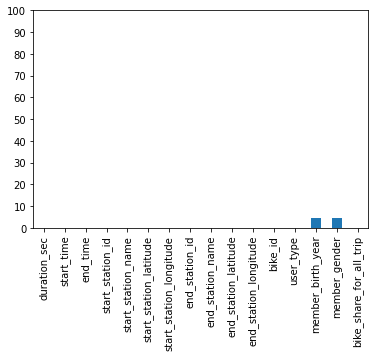

In [6]:
#check nan values

nanPerc = df.isna().sum()/len(df) * 100

#Create a Bar PLot to Investigate 
nanPerc.plot.bar()
plt.yticks(range(0,110,10))

print(nanPerc)
print('-'*100)
plt.show()

In [7]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

There are 183412 bike rides in ford GoBike sharing system with 16 entries each that describes the Ride details, The biker characteristics

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the most suitable way to make people use the Software more and the rides patterns

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Based on visual analysis I expect biker based details,location,Dates to help us alot as they describe the pattern of rides more than other features

## Univariate Exploration

I'll Start by visualizing Time patterns of rides 

In [8]:
#adding more time specific features


df['hour'] = df['start_time'].dt.hour
df['weekday'] = df['start_time'].dt.day_name()
df.iloc[:5,-2:]

,hour,weekday
0,17,Thursday
1,18,Thursday
2,12,Thursday
3,17,Thursday
4,23,Thursday


0       925
1       548
2       381
3       174
4       235
5       896
6      3485
7     10614
8     21056
9     15903
10     8364
11     7884
12     8724
13     8551
14     8152
15     9174
16    14169
17    21864
18    16827
19     9881
20     6482
21     4561
22     2916
23     1646
Name: hour, dtype: int64
----------------------------------------------------------------------------------------------------


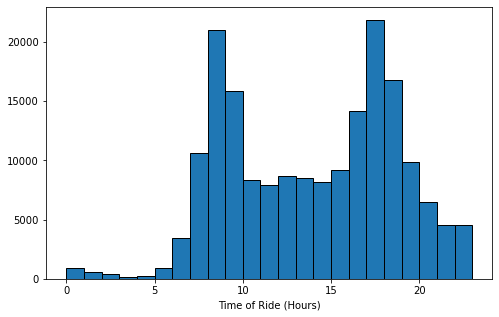

In [9]:
# start with a Histogram to find the distibution of the hours
binsize = 1  
bins = np.arange(0, df['hour'].max() + binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'hour', bins=bins, edgecolor = "black")
plt.xlabel('Time of Ride (Hours)')

print(df['hour'].value_counts().sort_index())
print('-'*100)

plt.show()

We Can see that most rides are between 7-9 in the morning and 4-6 in the evening which means that the time of the ride is mostly adjusted to the work hours 


<b>Secondly, we'll Visualize the distribution of rides by weekday : day.</b>

Friday       28981
Monday       26852
Saturday     15405
Sunday       15523
Thursday     35197
Tuesday      31813
Wednesday    29641
Name: weekday, dtype: int64
----------------------------------------------------------------------------------------------------


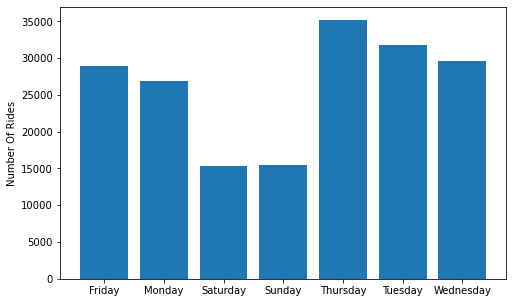

In [10]:
# plotting each Weekday
weekday_count = df['weekday'].value_counts().sort_index()

plt.figure(figsize=[8, 5])
plt.bar(data = weekday_count, x = weekday_count.index,height=weekday_count.values)
plt.ylabel('Number Of Rides')
print(weekday_count)
print('-'*100)
plt.show()

As expected the number of rides dropped at the weekend 

By investigating on the times of Rides based on hourse and days we can conclude that the rides are adjusted on the workday and we can safely put the assumption that most users are workers and we will investigate more on that by checking Age distribution


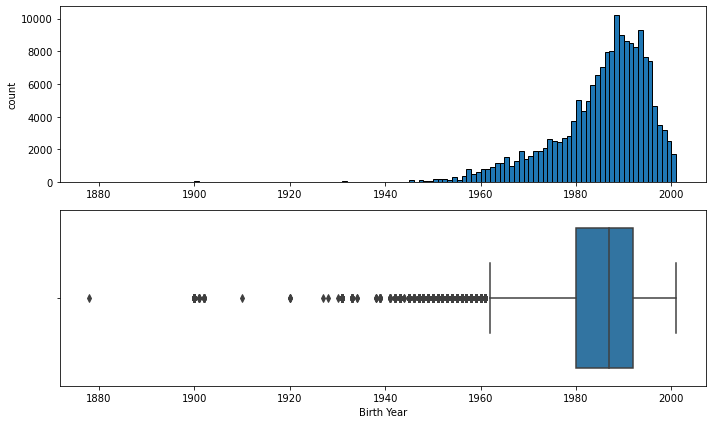

In [11]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

#histogram
min_year=df['member_birth_year'].min()
max_year=df['member_birth_year'].max()

binsize = 1
bins = np.arange(min_year,max_year + binsize, binsize)
axes[0].hist(data=df, x='member_birth_year', bins=bins, edgecolor="black")
axes[0].set_ylabel('count')

#boxplot
sns.boxplot(data=df, x='member_birth_year', ax=axes[1])

plt.xlabel('Birth Year')
plt.tight_layout()
plt.show()

we can see there's some outliers in the years which are unrealistic and needs to be filtered whoever we won't remove the row we can set the value as a nan so it won't cause disortion in the data

In [12]:
#set year less than 1950 as nan
df[df['member_birth_year'] < 1940] = np.nan

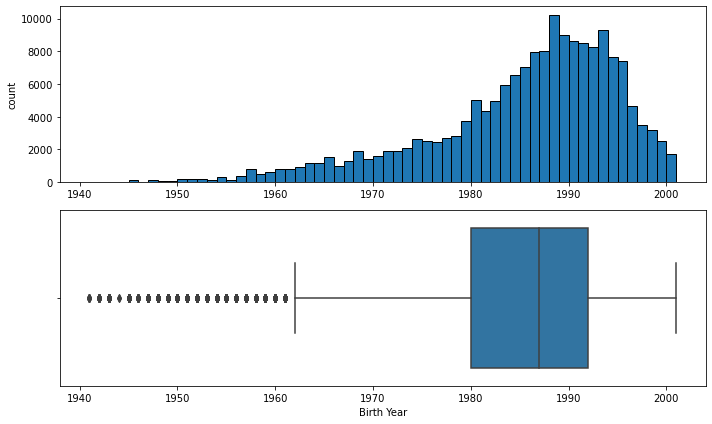

In [13]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

#histogram
min_year=df['member_birth_year'].min()
max_year=df['member_birth_year'].max()

binsize = 1
bins = np.arange(min_year,max_year + binsize, binsize)
axes[0].hist(data=df, x='member_birth_year', bins=bins, edgecolor="black")
axes[0].set_ylabel('count')

#boxplot
sns.boxplot(data=df, x='member_birth_year', ax=axes[1])

plt.xlabel('Birth Year')
plt.tight_layout()
plt.show()

as expected the age is mostly between 1980-late 90s which is in the range of san francisco workforce age 25-55 (https://www.ppic.org/publication/who-are-californias-workers/) 

<b>now we'll Move to Ride Duration and analyze it</b>

In [16]:
#first lets check if it matches with the start and end time
TimeDF_copy = df.copy()
TimeDF_copy['trip_duration_seconds'] = (TimeDF_copy['end_time'] - TimeDF_copy['start_time']).dt.total_seconds()
TimeDF_copy[np.floor(TimeDF_copy['trip_duration_seconds']) != TimeDF_copy['duration_sec']]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour,weekday,age,age_group,trip_duration_seconds
1285,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5197,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5266,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5447,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10827,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177885,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177955,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179280,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182830,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we can see the numbers match except for some nan values so they will be removed

In [17]:
#drop rows with more than 50% nan data

print(f'shape before : {df.shape}')
print('-'*100)
df = df.dropna(thresh=len(df.columns) * 0.5)
print(f'shape after : {df.shape}')
print('-'*100)


shape before : (183412, 20)
----------------------------------------------------------------------------------------------------
shape after : (183209, 20)
----------------------------------------------------------------------------------------------------


<b>after cleaning the nan values we'll start the analysis for duration</b>

In [18]:
#change it to minutes for easier observation and a better scale

df['ride_duration'] = df['duration_sec'] / 60
df.drop(columns=['duration_sec'], inplace=True)


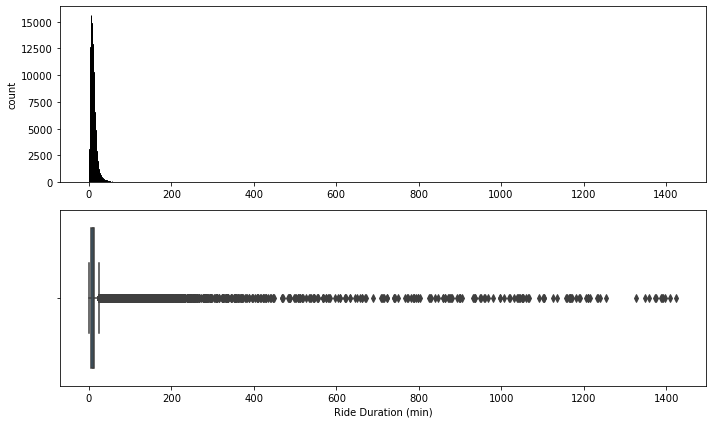

In [19]:
# distribution of ride duration
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

#histogram
min_duration = df['ride_duration'].min() 
max_duration = df['ride_duration'].max()

binsize = 1
bins = np.arange(min_duration, max_duration + binsize, binsize)
axes[0].hist(data=df, x='ride_duration', bins=bins, edgecolor="black")
axes[0].set_ylabel('count')

#boxplot
sns.boxplot(data=df, x='ride_duration', ax=axes[1])

plt.xlabel('Ride Duration (min)')
plt.tight_layout()
plt.show()

the data looks extremely skewed so we'll try using the mean (12 minutes) as estimation to avoid the outliers without removing them as they may indicate other things like users not stopping the ride until even after they reach their destination

we'll set the range to 60 minutes as by looking at the mean and the 3rd quartile range (15 min) the data seems to be left skewed and most of the values would fall in that range

In [20]:


# Filter out outliers
outliers =df[~((df['ride_duration'] < 35))]
df = df[(df['ride_duration'] < 35)]


In [21]:
outliers.shape

(4788, 20)

there's 1710 outliers which are 5% of the data and they can represent the rides in which riders didn't end the ride until later on which we can investigate on

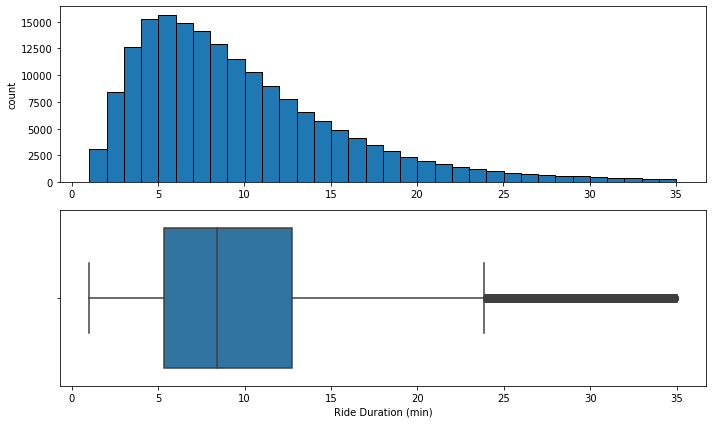

In [22]:
# distribution of ride duration after filtering
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

#histogram
min_duration = df['ride_duration'].min() 
max_duration = df['ride_duration'].max()

binsize = 1
bins = np.arange(min_duration, max_duration + binsize, binsize)
axes[0].hist(data=df, x='ride_duration', bins=bins, edgecolor="black")
axes[0].set_ylabel('count')

#boxplot
sns.boxplot(data=df, x='ride_duration', ax=axes[1])

plt.xlabel('Ride Duration (min)')
plt.tight_layout()
plt.show()

We can see that most rides are within 20 minutes which indicates that most riders use the bike for closer trips however some riders use it for 20+ minutes rides which can have a correlation with the walkability of the district 

<b>categorical variables</b>
<br>
We will start with the start Location where we want to see which areas are more active, we will use geopy API to get the neighbourhood for each street using the coordinates

we will start by shortening the street names to get better results in the scraping

In [561]:
#first lets extract street names and assign them to san franscisco for better accuracy of the api 
df['start_coordinate'] = list(zip(df['start_station_latitude'], df['start_station_longitude']))
df['end_coordinate'] = list(zip(df['end_station_latitude'], df['end_station_longitude']))

start_locationsDF = df.loc[:,['start_coordinate']]
start_locationsDF.drop_duplicates(inplace=True)

end_locationsDF = df.loc[:,['end_coordinate']]
end_locationsDF.drop_duplicates(inplace=True)


start_locationsDF.head()

,start_coordinate
4,"(37.8045623549303, -122.27173805236816)"
5,"(37.7704074, -122.3911984)"
6,"(37.3172979, -121.884995)"
7,"(37.79539293725452, -122.4047702550888)"
9,"(37.788975, -122.403452)"


the reason that we created a separate dataframe for each start and end locations is bcz the distinct locations if we dropped the duplicates in the same df would be significantly higher so to reduce the api time by a huge margin we created to seperate dataframes

Now We will use the api to get every Location Greater Area

In [478]:
# save a copy so that it's not lost after Run
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm

# Initialize the geolocator
geolocator = Nominatim(user_agent='FordGoBike')

# Initialize the RateLimiter with a rate limit of 1 request per second
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=0.7)

# Apply the geocoding function to each start coordinate
#we're using tqdm module to check the progress of the api responses
pbar = tqdm(total=len(end_locationsDF)+len(start_locationsDF))
def apply_geocode(coordinate):
    pbar.update(1)
    return geocode(coordinate)

start_locationsDF['address'] = start_locationsDF['start_coordinate'].apply(apply_geocode)
end_locationsDF['address'] = end_locationsDF['end_coordinate'].apply(apply_geocode)

# Close the progress bar
pbar.close()
# Extract the 'neighbourhood' from the address information
start_locationsDF['start_area'] = start_locationsDF['address'].apply(lambda x: (x.raw['address']['neighbourhood'] if 'neighbourhood' in x.raw['address'].keys() else x.raw['address']['road'] if 'road' in x.raw['address'].keys() else None))
end_locationsDF['end_area'] = end_locationsDF['address'].apply(lambda x: (x.raw['address']['neighbourhood'] if 'neighbourhood' in x.raw['address'].keys() else x.raw['address']['road'] if 'road' in x.raw['address'].keys() else None))

 79%|███████████████████████████████████████████████████████████████▏                | 544/689 [06:24<01:42,  1.42it/s]RateLimiter caught an error, retrying (0/2 tries). Called with (*((37.8225475, -122.2663179),), **{}).
Traceback (most recent call last):
  File "C:\Users\I7\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\I7\anaconda3\lib\site-packages\urllib3\util\connection.py", line 72, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\I7\anaconda3\lib\socket.py", line 954, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\I7\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 703, in urlopen
    httplib_response = sel

By using geopy API we successfully got the neighbourhoods & streets using the coordinates to get a more detailed info abt the patterns of the rides

In [ ]:
# Merge the DataFrames
SF_df = df.merge(start_locationsDF[['start_coordinate', 'start_area']], on='start_coordinate')
SF_df = SF_df.merge(end_locationsDF[['end_coordinate', 'end_area']],on='end_coordinate')
SF_df.head()

In [563]:
# saving the new DF
#SF_df.to_csv('Ford_GoBike_Updated.csv',index=False)

In [23]:
SF_df = pd.read_csv('Ford_GoBike_Updated.csv')
SF_df = SF_df[(SF_df['ride_duration'] < 35)]

In [24]:
len(SF_df['start_area'].unique())

128

there's 128 unique area (neighbourhoods) in the data set while there was 315 different streets

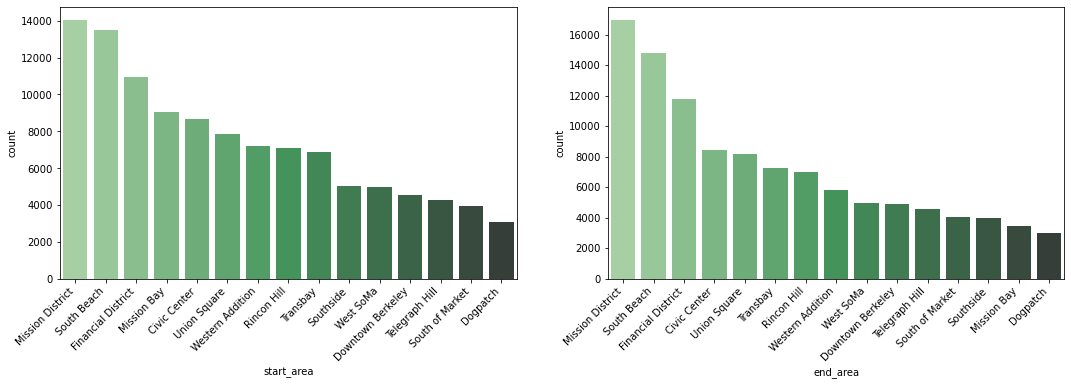

In [25]:


fig, ax = plt.subplots(ncols=2, figsize = [18,5])


default_color = sns.color_palette()[0]
sns.countplot(data=SF_df, x="start_area", palette="Greens_d",order=SF_df.start_area.value_counts().sort_values(ascending=False).iloc[:15].index, ax=ax[0])
ax[0].set_xticklabels(labels=SF_df.start_area.value_counts().sort_values(ascending=False).iloc[:15].index, rotation=45, ha='right')

sns.countplot(data=SF_df, x="end_area", palette="Greens_d",order=SF_df.end_area.value_counts().sort_values(ascending=False).iloc[:15].index, ax=ax[1])
ax[1].set_xticklabels(labels=SF_df.end_area.value_counts().sort_values(ascending=False).iloc[:15].index, rotation=45, ha='right')


  
plt.show()

The most common start and end Locations.
we can see that the neighbourhoods show similar results in start and end locations meaning the rides are normally in closer ranges 

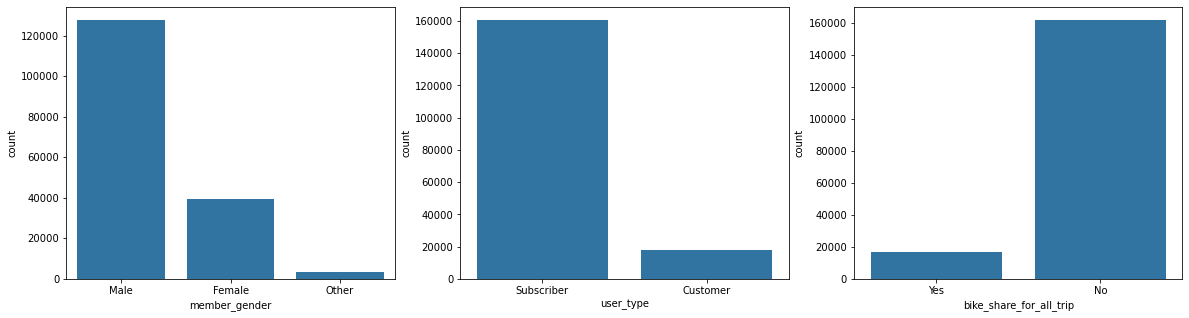

In [26]:

#counting user details variables
fig, ax = plt.subplots(ncols=3, figsize = [20,5])

default_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'member_gender', color = default_color, ax = ax[0])
sns.countplot(data = df, x = 'user_type', color = default_color, ax = ax[1])
sns.countplot(data = df, x = 'bike_share_for_all_trip', color = default_color, ax = ax[2])

  
plt.show()

We Can see that The system is mostly used by males who are subscribed to the system we'll investigate more on the average ride duration for each user Later

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The start and end date needed to be changed and adjusted for better use and the age of user had some unusual values,trip Duration had extreme outliers too

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the trip Durationnvariable, a number of outlier points were identified. Overall, these points can be characterized as part of the trip pattern where some users (5% of the rides) tend to not end the trip until later
<br>
the user age had some outliers too but they were managed and removed as they were irrational

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [27]:
SF_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178421 entries, 0 to 181498
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_time               178421 non-null  object 
 1   end_time                 178421 non-null  object 
 2   start_station_id         178234 non-null  float64
 3   start_station_name       178234 non-null  object 
 4   start_station_latitude   178421 non-null  float64
 5   start_station_longitude  178421 non-null  float64
 6   end_station_id           178234 non-null  float64
 7   end_station_name         178234 non-null  object 
 8   end_station_latitude     178421 non-null  float64
 9   end_station_longitude    178421 non-null  float64
 10  bike_id                  178421 non-null  int64  
 11  user_type                178421 non-null  object 
 12  member_birth_year        170754 non-null  float64
 13  member_gender            170754 non-null  object 
 14  bike

In [28]:
numeric_vars = ['hour','ride_duration', 'age',]
categoric_vars = ['weekday','member_gender','user_type','age_group']

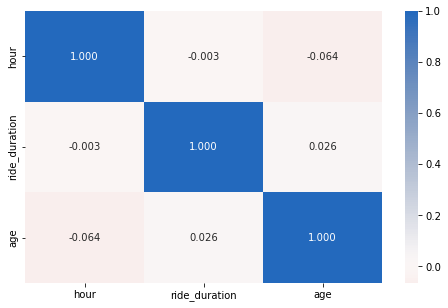

In [29]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(SF_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

as we can see there's no clear realtion between the numeric values in the df but we can notice the relation in categorical values based on the assumptions we made and the visuals

<Figure size 720x720 with 0 Axes>

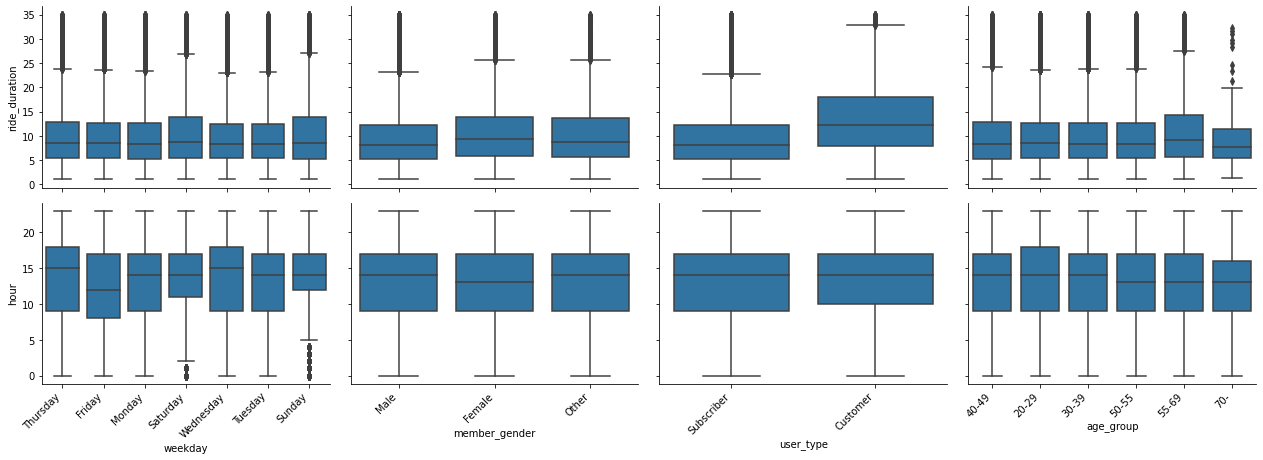

In [30]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

# Deprecated
# samples = np.random.choice(diamonds.shape[0], 2000, replace = False)
# diamonds_samp = diamonds.loc[samples,:]



def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)
    plt.xticks(rotation=45,ha='right')


plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = SF_df, y_vars = ['ride_duration', 'hour'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
plt.xticks(rotation=45,ha='right')
g.map(boxgrid)
plt.show();

There appears to be a relation between the hour and the numeric columns except in the weekday there's some different relation during saturday and sunday while the other categories indicate the same thing, the ride duration seems to be the same throughout different categories



<b>lets look at the correlation between the age of the rider and the time of the ride to see it from a different prespective



In [33]:
#assigning users into age groups

current_year = 2017  
df['age'] = current_year - df['member_birth_year']
ageborder = [20, 30, 40, 50, 55, 70, 80] 
labels = ['20-29', '30-39', '40-49', '50-55', '55-69', '70-']
df['age_group'] = pd.cut(df['age'], bins=ageborder, labels=labels)  

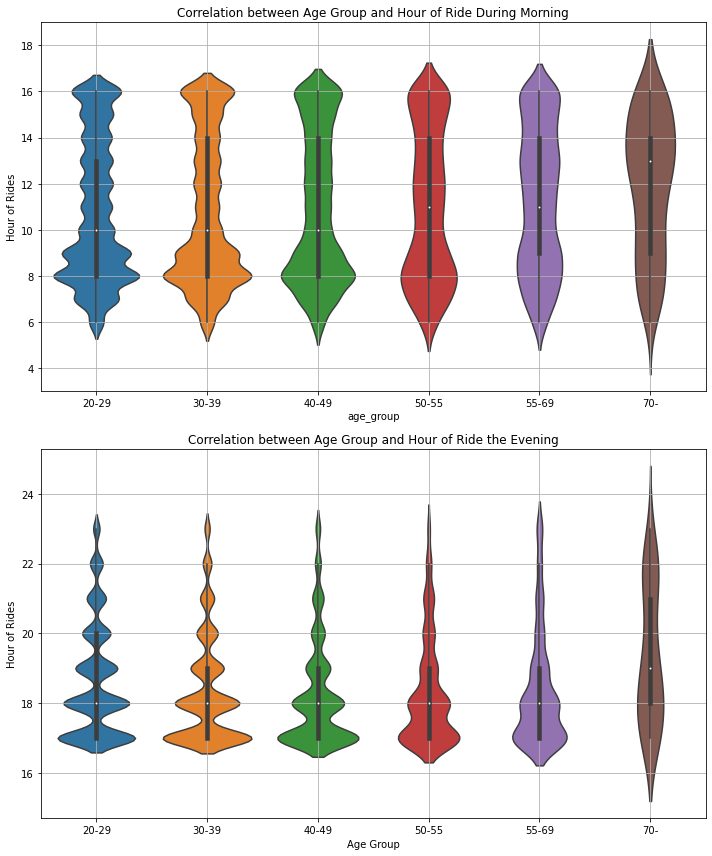

In [34]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Correlation in the morning
df_morning = df[(df['hour'] >= 6) & (df['hour'] <= 16)]
sns.violinplot(data=df_morning, x='age_group', y='hour', ax=axes[0])
axes[0].set_title('Correlation between Age Group and Hour of Ride During Morning')
axes[0].set_ylabel('Hour of Rides')
axes[0].grid(True)

# Correlation in the evening
df_evening = df[ (df['hour'] > 16)]
sns.violinplot(data=df_evening, x='age_group', y='hour', ax=axes[1])
axes[1].set_title('Correlation between Age Group and Hour of Ride the Evening')
axes[1].set_ylabel('Hour of Rides')
axes[1].set_xlabel('Age Group')
axes[1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

using violin plot to visualize the relation between the age group and the hour of the ride during the evening and the morning and we can see that in age groups between 20-50 the hours are more skewed with the skewness decreasing as the age increase

<b>categorical columns with the top areas

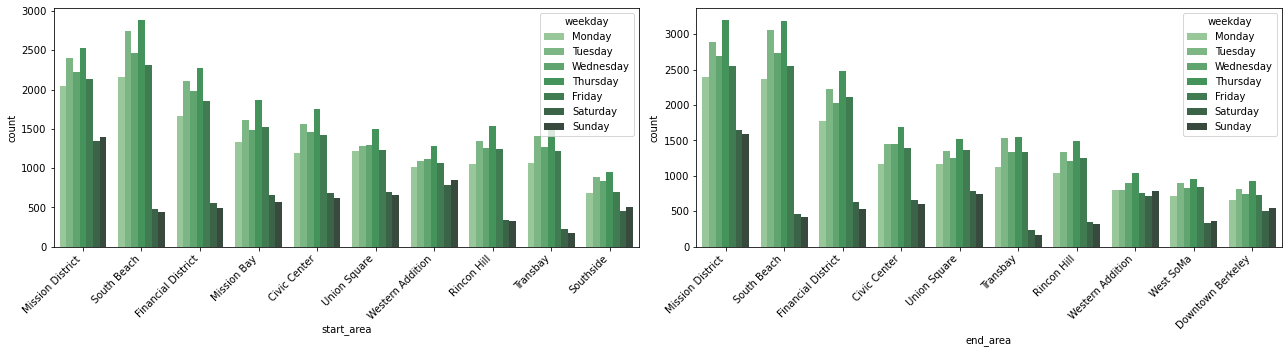

In [71]:
fig, ax = plt.subplots(ncols=2, figsize=[18, 5])
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

default_color = sns.color_palette()[0]

ax1 = plt.subplot(1, 2, 1)
top_start_areas = SF_df['start_area'].value_counts().sort_values(ascending=False).head(10).index
start_area_order = SF_df.loc[SF_df['start_area'].isin(top_start_areas), 'start_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=SF_df[SF_df['start_area'].isin(top_start_areas)], x="start_area", hue='weekday', palette="Greens_d", order=start_area_order,hue_order=weekday_order, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax2 = plt.subplot(1, 2, 2)
top_end_areas = SF_df['end_area'].value_counts().sort_values(ascending=False).head(10).index
end_area_order = SF_df.loc[SF_df['end_area'].isin(top_end_areas), 'end_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=SF_df[SF_df['end_area'].isin(top_end_areas)], x="end_area", hue='weekday', palette="Greens_d", order=end_area_order,hue_order=weekday_order, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

We can see that count varies each day and significantly drops everywhere during the end of the week but we can notice a strange pattern here as the general count of rides decrease the amount of trips during the weekend doesn't significantly decrease we can investigate more on that by seeing the areas in the middle of the rankings

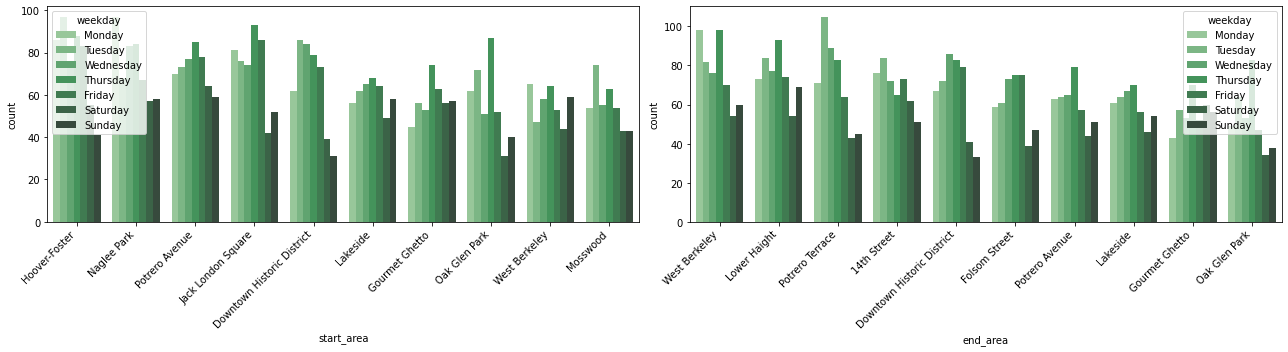

In [72]:
middle_start_areas = SF_df['start_area'].value_counts().iloc[int(len(SF_df['start_area'].unique())/2):int((len(SF_df['start_area'].unique())/2)+10)].index
middle_end_areas = SF_df['end_area'].value_counts().iloc[int(len(SF_df['end_area'].unique())/2):int((len(SF_df['end_area'].unique())/2)+10)].index

fig, ax = plt.subplots(ncols=2, figsize=[18, 5])
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

default_color = sns.color_palette()[0]

ax1 = plt.subplot(1, 2, 1)
start_area_order = SF_df.loc[SF_df['start_area'].isin(middle_start_areas), 'start_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=SF_df[SF_df['start_area'].isin(middle_start_areas)], x="start_area", hue='weekday', palette="Greens_d", order=start_area_order,hue_order=weekday_order, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


ax2 = plt.subplot(1, 2, 2)
end_area_order = SF_df.loc[SF_df['end_area'].isin(middle_end_areas), 'end_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=SF_df[SF_df['end_area'].isin(middle_end_areas)], x="end_area", hue='weekday', palette="Greens_d", order=end_area_order,hue_order=weekday_order, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

we can see that there's less correlation and the rides are sometimes high in the weekend which can be explained that the areas that are in the top are mostly worker dependant areas were most services are so the rides are more in the weekdays rather than weekends while normal areas have more distributed number of rides through the week as they're not dependant on work

<b>now lets check the most common start --> end areas destinations

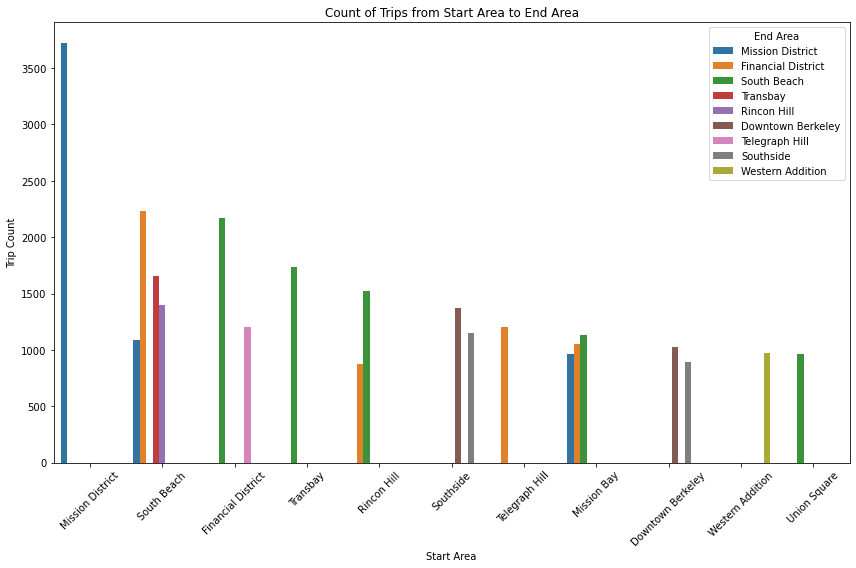

In [73]:
trip_counts = SF_df.groupby(['start_area', 'end_area']).size().sort_values(ascending=False).reset_index(name='trip_count').iloc[:20]
trip_counts


plt.figure(figsize=(12, 8))
sns.barplot(x='start_area', y='trip_count', hue='end_area', data=trip_counts)
plt.title('Count of Trips from Start Area to End Area')
plt.xlabel('Start Area')
plt.ylabel('Trip Count')
plt.xticks(rotation=45)
plt.legend(title='End Area', loc='upper right')
plt.tight_layout()
plt.show()


We can see some areas like Mission District,Transbay,Western Addition,Union Square mostly have rides that are inside of it while other areas are more attracting to other neighbourhoods

<b>average ride duration per gender

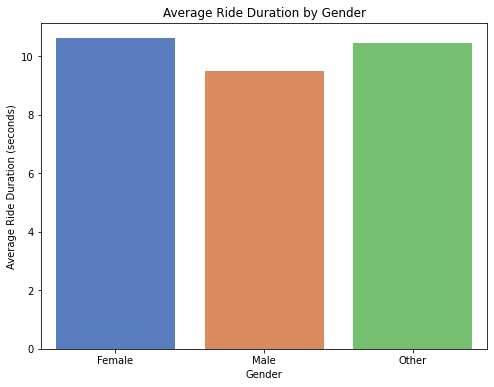

In [82]:


# Group by gender and calculate the mean ride duration
gender_avg_duration = SF_df.groupby('member_gender')['ride_duration'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=gender_avg_duration, x='member_gender', y='ride_duration', palette='muted')
plt.title('Average Ride Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Ride Duration (min)')
plt.show()


<b>average ride duration per User Type

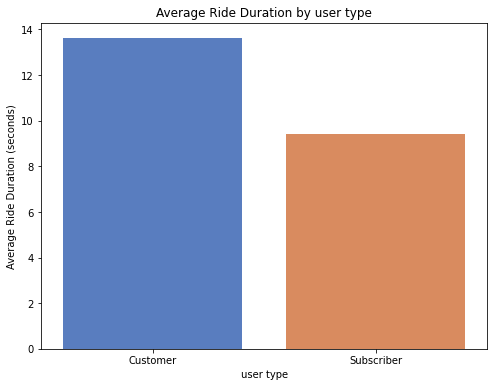

In [83]:


# Group by gender and calculate the mean ride duration
gender_avg_duration = SF_df.groupby('user_type')['ride_duration'].mean().reset_index()

# Plot average ride duration by gender
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_avg_duration, x='user_type', y='ride_duration', palette='muted')
plt.title('Average Ride Duration by user type')
plt.xlabel('user type')
plt.ylabel('Average Ride Duration (min)')
plt.show()


We can see there's a difference in average ride duration between customers and subscribers which can be explained that subscribers usually take the bike to their usual destinations like work, to the park, University while customer rides can vary

<b> user type by gender

<Figure size 720x432 with 0 Axes>

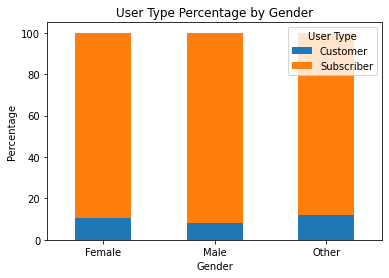

In [84]:
gender_user_type_counts = SF_df.groupby(['member_gender', 'user_type']).size().unstack()
gender_user_type_percentages = gender_user_type_counts.div(gender_user_type_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
gender_user_type_percentages.plot(kind='bar', stacked=True)
plt.title('User Type Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='User Type')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

we Visualized some relations between the categorical columns and the two  variables  (ride duration,hour of ride) and the results were uniform across the cateogries showing similar results.<br>
We noticed the distribution of the hour of the ride based on age group and we can see that as the age cateogry  increase it become more of a normal distribution.<br>
the Start and end areas also showed some interesting relations as the rides count during the week for high rides denisty neighbourhoods isn't as uniformly distributed we noticed that in areas with medium rides density the count was close throughout weekdays another interesting insight was that the many areas didn't have alot of ride going outside while it was mostly rides that are in the sameneighbourhoods 



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

We noticed that men on average take less time during their rides and we also found out that customers on average take longer rides than subscribers


## Multivariate Exploration



let's see some relations regarding the ride duration and the age amongst subscribers and customers

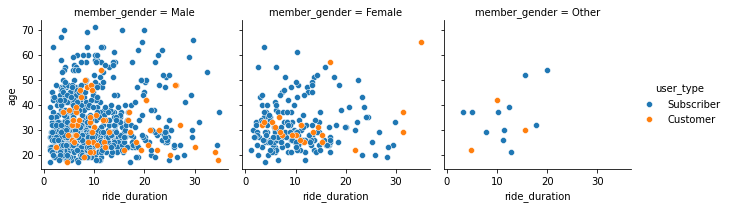

In [107]:
#taking a sample or a better visual

g = sns.FacetGrid(SF_df.sample(1000), col='member_gender', hue='user_type')
g.map(sns.scatterplot, 'ride_duration', 'age')
g.add_legend()
plt.show()

we can see that age and ride duration among both men and women and for both types of users are concenterated between 0-20 min and the age is between 20-50

<b>ride Duration and Age with respect to member gender

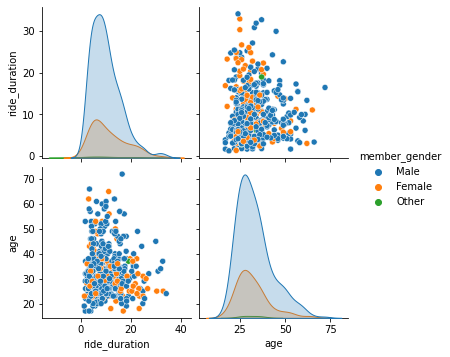

In [102]:
sns.pairplot(SF_df.sample(500), vars=['ride_duration', 'age'], hue='member_gender', diag_kind='kde')
plt.show()

<b> Relation between User Gender and the day of the Week to see if there's some insights

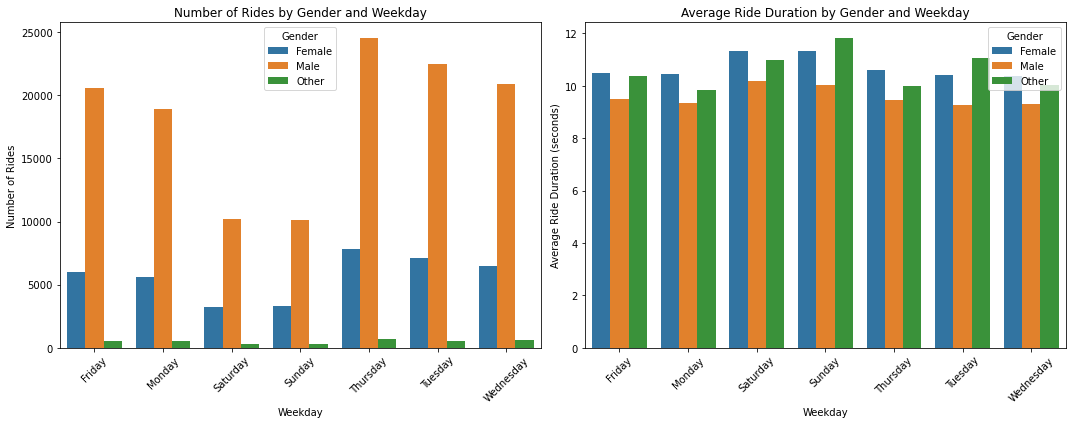

In [104]:

# Group by gender and weekday and count the number of rides
gender_weekday_counts = SF_df.groupby(['member_gender', 'weekday']).size().reset_index(name='ride_count')

# Group by gender and weekday and calculate the mean ride duration
gender_weekday_duration = SF_df.groupby(['member_gender', 'weekday'])['ride_duration'].mean().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot number of rides by gender and weekday
sns.barplot(data=gender_weekday_counts, x='weekday', y='ride_count', hue='member_gender', ax=axes[0])
axes[0].set_title('Number of Rides by Gender and Weekday')
axes[0].set_xlabel('Weekday')
axes[0].set_ylabel('Number of Rides')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].legend(title='Gender')

# Plot average ride duration by gender and weekday
sns.barplot(data=gender_weekday_duration, x='weekday', y='ride_duration', hue='member_gender', ax=axes[1])
axes[1].set_title('Average Ride Duration by Gender and Weekday')
axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('Average Ride Duration (seconds)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].legend(title='Gender')

plt.tight_layout()
plt.show()

we  can see men take significantly more rides with less duration but the ride durations are Very Close 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I focused more on observing relations regarding categorical values with multiple values we noticed some relations with ride durations and age with the user types which added to the insights in univariate and bivariate visuals
### Were there any interesting or surprising interactions between features?

male members having on average less time despite being the largest percentage of users